# Energy intesity of the CPI

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns 

# Import electricity and gas price data

source: 
[Department for Energy Security and Net Zero and Department for Business, Energy & Industrial Strategy](https://www.gov.uk/government/statistical-data-sets/gas-and-electricity-prices-in-the-non-domestic-sector)

In [2]:
# import the data obtained for the gov.uk website
egprices = pd.read_excel('./Data/gas and elec non domestic prices.xlsx')

In [3]:
egprices.head()

,Year,Quarter,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh),Gas: Very Small (Pence per kWh),Gas: Small (Pence per kWh),Gas: Medium (Pence per kWh),Gas: Large (Pence per kWh),Gas: Very Large (Pence per kWh),Gas: Average (Pence per kWh)
0,2004,1st,6.041900,5.491762,4.139750,3.639109,3.376946,2.975759,NaN,4.015,1.613505,1.406366,1.163652,1.040894,0.877579,1.251000
1,2004,2nd,6.128515,5.310131,4.213574,3.653105,3.297979,2.858516,NaN,3.887,1.466271,1.304053,1.262996,1.034469,1.087342,1.225000
2,2004,3rd,6.392726,4.763896,3.928002,3.732960,3.676800,3.113938,NaN,3.946,1.688511,1.513226,1.214925,0.906780,0.984872,1.209000
3,2004,4th,6.442553,5.724362,4.898325,4.282188,4.186195,3.814257,NaN,4.742,1.485573,1.394492,1.339390,1.200072,1.036643,1.305574
4,2005,1st,6.610770,5.930425,5.273539,4.563788,4.303348,3.841138,NaN,4.845,1.834352,1.725252,1.596385,1.437451,1.287418,1.580000


In [13]:
# remove the number ordinals from the quarter column
egprices['Quarter'] = egprices['Quarter'].str.replace(r'(st|nd|rd|th)', '', regex=True)

# convert the year and quarter columns into one period object
egprices['period'] = pd.to_datetime(egprices['Year'].astype(str) + 'Q' + egprices['Quarter'].astype(str)).dt.to_period('Q')                                	        

In [7]:
# create two new dataframes for electricity and gas to make things easier
eprice = egprices[['period', 
                  'Electricity: Very Small (Pence per kWh)', 
                  'Electricity: Small (Pence per kWh)', 
                  'Electricity: Small/Medium (Pence per kWh)', 
                  'Electricity: Medium (Pence per kWh)',
                  'Electricity: Large (Pence per kWh)',
                  'Electricity: Very Large (Pence per kWh)',
                  'Electricity: Extra Large (Pence per kWh)',
                  'Electricity: Average (Pence per kWh)'
                 ]].copy()   

gprice = egprices[['period', 
                  'Gas: Very Small (Pence per kWh)', 
                  'Gas: Small (Pence per kWh)', 
                  'Gas: Medium (Pence per kWh)',
                  'Gas: Large (Pence per kWh)',
                  'Gas: Very Large (Pence per kWh)',
                  'Gas: Average (Pence per kWh)'
                 ]].copy()   

In [8]:
eprice.head()

,period,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh)
0,2004Q1,6.041900,5.491762,4.139750,3.639109,3.376946,2.975759,NaN,4.015
1,2004Q2,6.128515,5.310131,4.213574,3.653105,3.297979,2.858516,NaN,3.887
2,2004Q3,6.392726,4.763896,3.928002,3.732960,3.676800,3.113938,NaN,3.946
3,2004Q4,6.442553,5.724362,4.898325,4.282188,4.186195,3.814257,NaN,4.742
4,2005Q1,6.610770,5.930425,5.273539,4.563788,4.303348,3.841138,NaN,4.845


## Plot data raw data

### Electricity prices

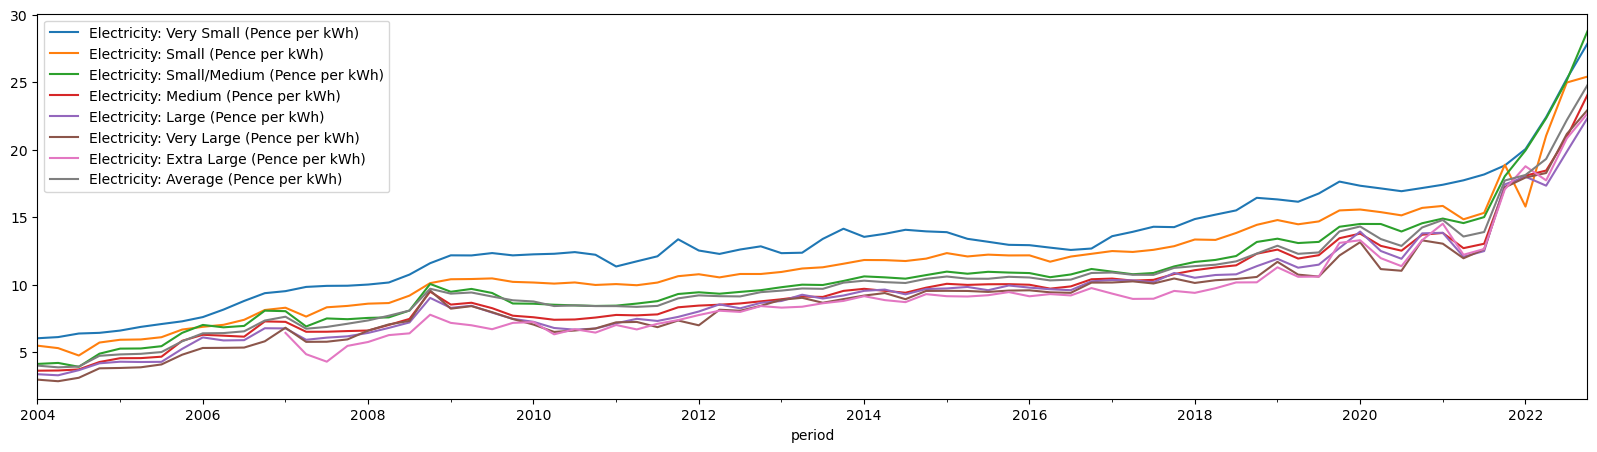

In [9]:
eprice.plot(x='period', figsize=(20, 5))
plt.show()

### Gas Prices

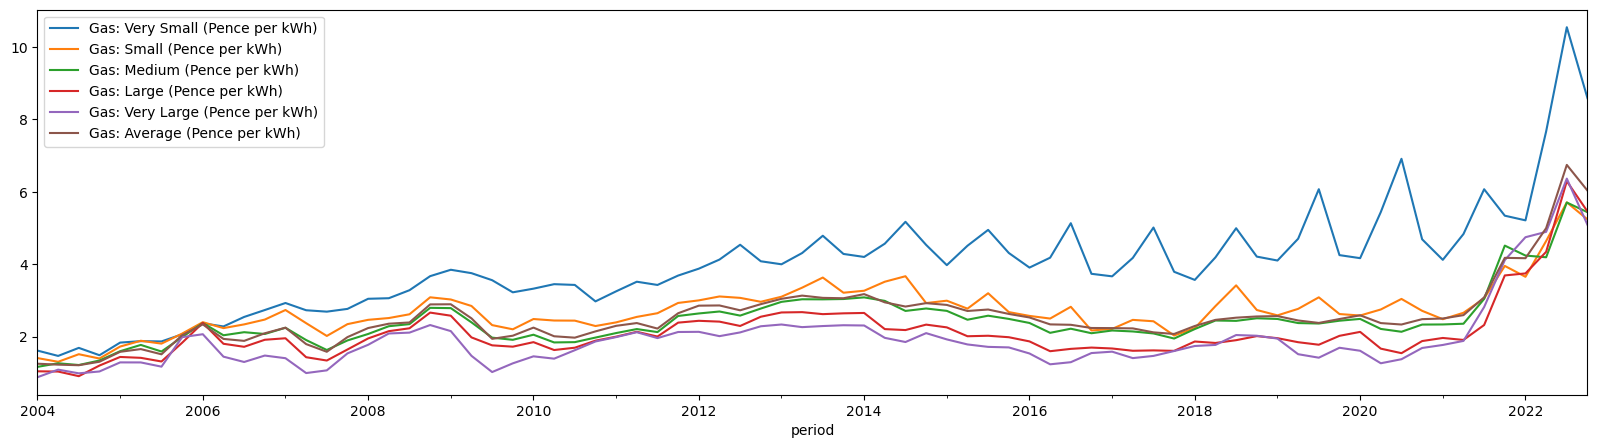

In [10]:
gprice.plot(x='period', figsize=(20, 5))
plt.show()

## Investigate difference between small and large consumers

### electricity

In [11]:
# create a new column in the dataframe which is the difference between the largest and smallest consumers costs.
eprice['elec difference'] = eprice['Electricity: Very Small (Pence per kWh)'] - eprice['Electricity: Extra Large (Pence per kWh)']

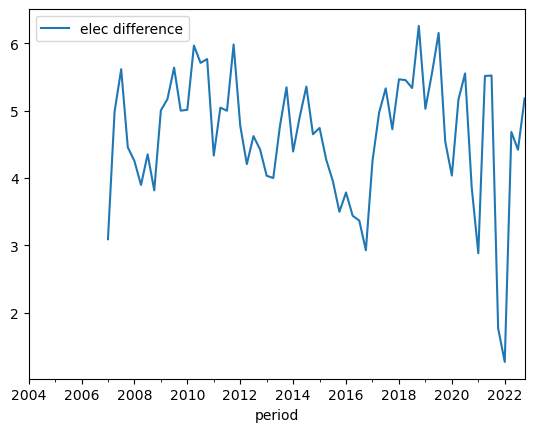

In [12]:
# plot the difference
eprice.plot(x='period', y='elec difference')
plt.show()